  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non

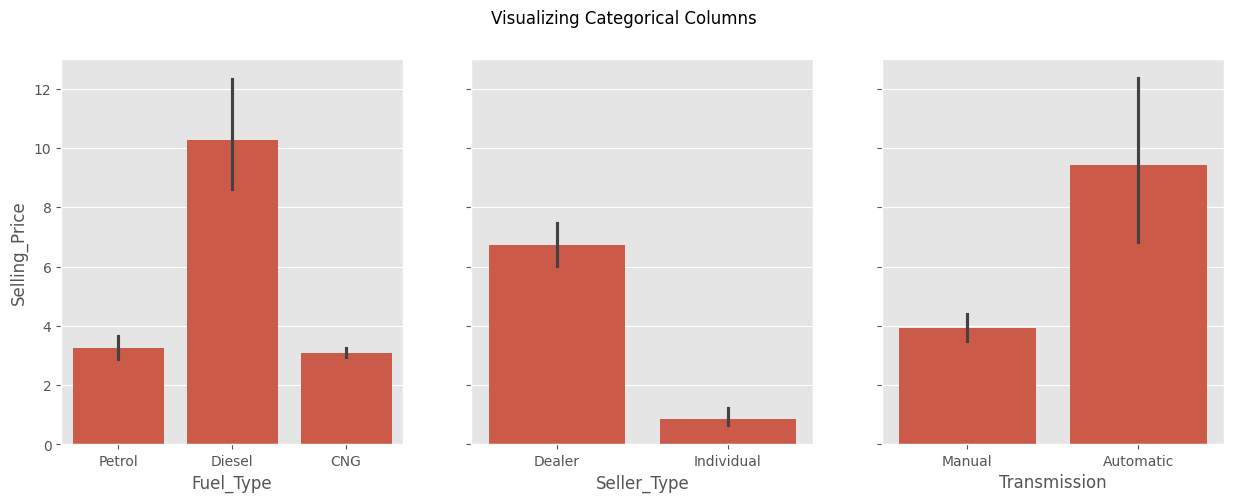

C:\Users\pra72\AppData\Local\Temp\ipykernel_2340\2326721.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data['Fuel_Type'] = car_data['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})


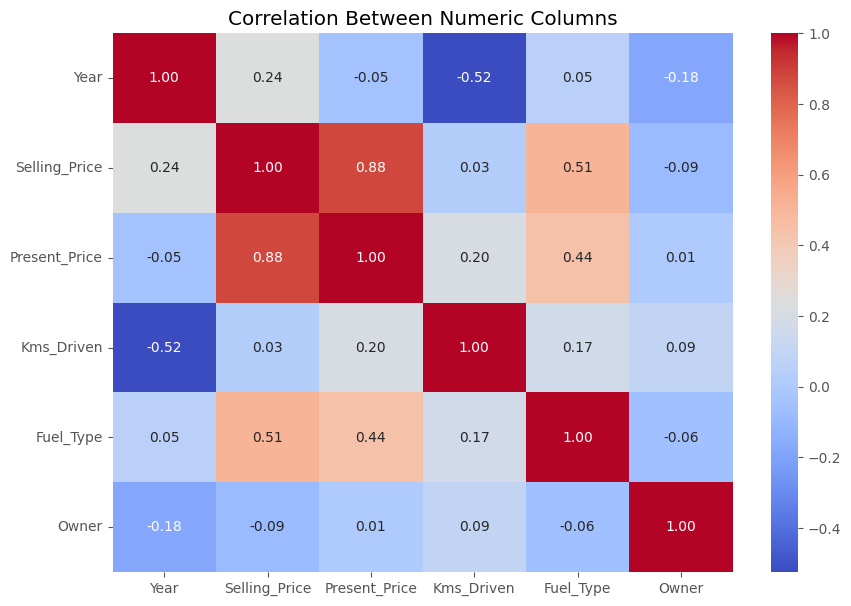

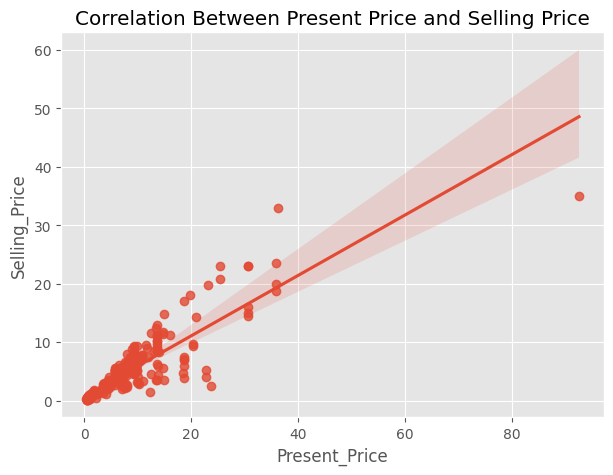

MAE: 1.2581404706473374
MSE: 3.4932860262251477
R2 Score: 0.8773175030338535


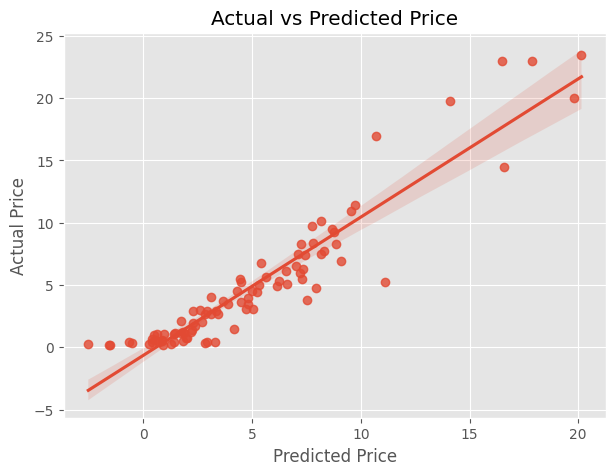

In [6]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
car_data = pd.read_csv('car data.csv')

# Data overview
print(car_data.head())
print(car_data.info())
print(car_data.isnull().sum())
print(car_data.describe())

# Value counts of categorical variables
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

# Visualizing categorical data
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Visualizing Categorical Columns')

# Bar plots for categorical variables
sns.barplot(x='Fuel_Type', y='Selling_Price', data=car_data, ax=axes[0])
sns.barplot(x='Seller_Type', y='Selling_Price', data=car_data, ax=axes[1])
sns.barplot(x='Transmission', y='Selling_Price', data=car_data, ax=axes[2])  # Corrected this line

plt.show()

# Manual encoding for Fuel_Type
car_data['Fuel_Type'] = car_data['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
car_data['Fuel_Type'] = car_data['Fuel_Type'].astype('int32').infer_objects()


# One-hot encoding for Seller_Type and Transmission
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)

# Check and filter numeric columns for correlation
numeric_cols = car_data.select_dtypes(include=['number']).columns

# Heatmap to visualize correlations
plt.figure(figsize=(10, 7))
sns.heatmap(car_data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numeric Columns')
plt.show()

# Scatter plot for price correlation
plt.figure(figsize=(7, 5))
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)
plt.title('Correlation Between Present Price and Selling Price')
plt.show()

# Preparing the data for modeling
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(7, 5))
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()
